In [1]:
import numpy
from pandas import read_csv
import matplotlib.pyplot as plt
import cv2

import ex3_img_processing

import ex1_regular_shape_detector

C:\Users\tyraf\AppData\Local\Temp\ipykernel_27960\1943283989.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  from pandas import read_csv


# EXAM 1 SHAPE DETECTOR :

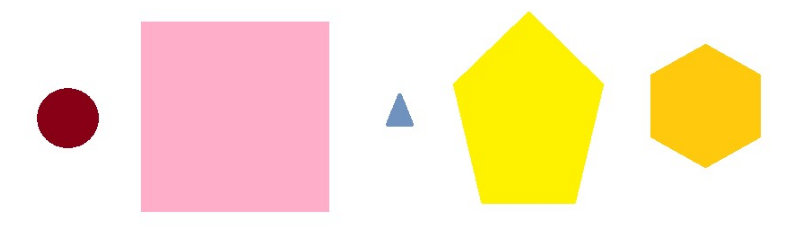

In [2]:
shape_detector = ex1_regular_shape_detector.RegularShapeDetector('files/shapes.jpg')
# print(shape_detector.shape_areas)
shape_detector.display_image()

In [3]:
shape_detector.shape_info

{'Shape_0': {'Name': 'Triangle', 'Area': 662.0, 'Regular': False},
 'Shape_1': {'Name': 'Circle', 'Area': 3624.0, 'Regular': True},
 'Shape_2': {'Name': 'Hexagon', 'Area': 12865.0, 'Regular': True},
 'Shape_3': {'Name': 'Square', 'Area': 44314.0, 'Regular': True},
 'Shape_4': {'Name': 'Pentagon', 'Area': 25129.0, 'Regular': False}}

In [4]:
# shape_detector.find_shape_areas()

shape_detector.save_results_as_df("files/demo_saves/sorted_shape_data.csv")


In [5]:
df = read_csv('files/demo_saves/sorted_shape_data.csv')
df.head()

,Name,Area,Regular
0,Square,44314.0,True
1,Pentagon,25129.0,False
2,Hexagon,12865.0,True
3,Circle,3624.0,True
4,Triangle,662.0,False


# EXAM 3 : IMAGE PROCESSING

In [6]:
# Example Usage:
image_processor = ex3_img_processing.MyImageProcessor('files/shapes.jpg')

In [7]:
print(image_processor.image_path)

files/shapes.jpg


In [8]:
print(image_processor.image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Manipulate

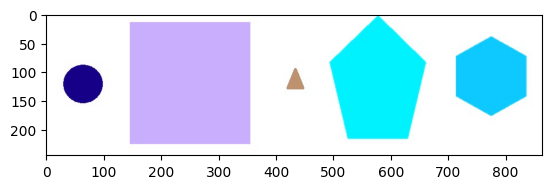

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image_processor.image)

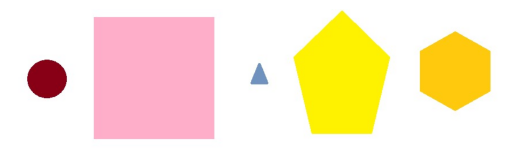

In [10]:
rgb_image = image_processor.bgr_2_rgb_convertor()


In [11]:
numpy.array_equal(image_processor.image, rgb_image)
# Does not change the original img, creates a new one instead

False

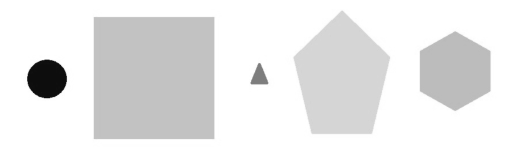

In [12]:
gray_image = image_processor.bgr_2_gray_scale_convertor()


In [13]:
image_processor.image.shape

(245, 864, 3)

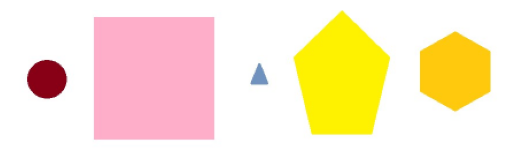

(122, 432, 3)

In [14]:
resized_image = image_processor._50_percent_resizer()
resized_image.shape


(245, 864, 3)

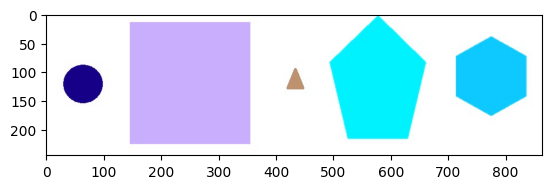

In [15]:
plt.imshow(image_processor.image) # original is in bgr
image_processor.image.shape

Misc

(245, 864, 3)

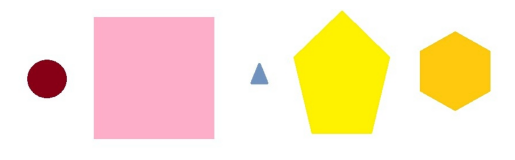

In [16]:
# saves imageprocessor.image
image_processor.bgr_image_writer('files/demo_saves/bgr_image.jpg')
img = cv2.imread('files/demo_saves/bgr_image.jpg')
plt.imshow(img)
plt.axis('off')
img.shape # Right shape

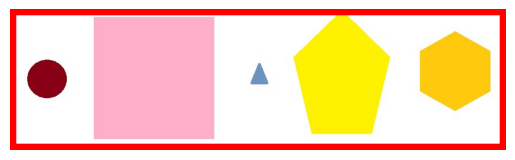

In [17]:
# frame_it
image_with_frame = image_processor.frame_it('files/demo_saves/output_image_with_frame.jpg')
plt.axis('off')

plt.imshow(image_with_frame)

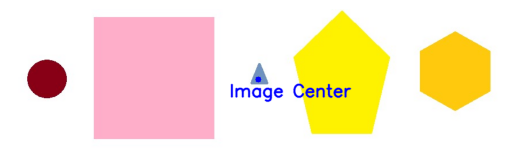

In [18]:
# find_center
image_with_center = image_processor.find_center('files/demo_saves/output_image_with_center.jpg')
plt.axis('off')
plt.imshow(image_with_center)

Face detection

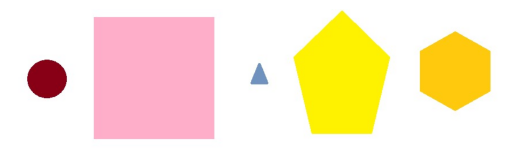

Number of Faces: 0


In [19]:
image_without_faces, num_faces = image_processor.detect_faces()
plt.imshow(image_without_faces)
plt.axis('off')
plt.show()

print(f"Number of Faces: {num_faces}")


In [20]:
face_processor = ex3_img_processing.MyImageProcessor('files/facedetect.jpg')
image_with_face, num_faces = face_processor.detect_faces()

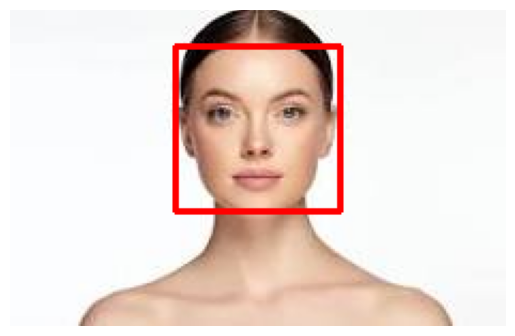

Number of Faces: 1


In [21]:
plt.imshow(image_with_face)
plt.axis('off')
plt.show()

print(f"Number of Faces: {num_faces}")

# EXAM 2 : IMAGE CLASSIFICATION

In [22]:
from ex2_image_classification import ImageClassification

In [23]:
classifier = ImageClassification('files/meeting.jpg')

person
laptop
person
person
tie


In [24]:
# classifier.get_labels()

In [25]:
# tuple(classifier.detect_objects())

In [26]:
classifier.display_boxed_image(classifier.boxed_image)

AttributeError: 'ImageClassification' object has no attribute 'display_boxed_image'

In [ ]:
classifier.save_boxes_to_folders()

In [ ]:
set(classifier.detected_object_ids) # make sure its unique

{0, 27, 60, 63, 73}

In [ ]:
len(classifier.detected_object_ids)

77

##### video classification

person
laptop
person
person
tie


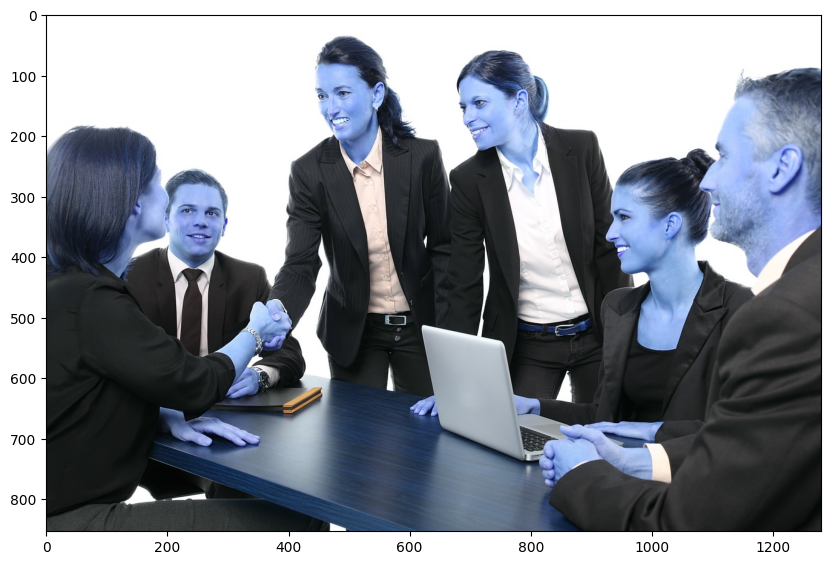

In [ ]:
# # Example usage
input_path = "files/meeting.jpg"
# input_path = "files/video_walking.mp4"

vid_classifier = ImageClassification(input_path)
# # cvid_lassifier.process_input()
vid_classifier.display_boxed_image(vid_classifier.image)